## IS6 in Python: Multiple Regression (Chapter 9)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 9: Multiple Regression

In [1]:
#Load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import qqplot

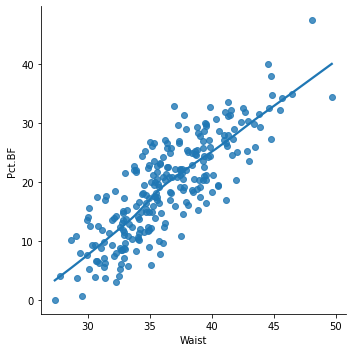

In [2]:
#Figure 9.1, page 292
fat = pd.read_csv("datasets/bodyfat.txt", sep = "\t")
fat

sns.lmplot(data = fat, x = "Waist", y = "Pct.BF", lowess = True, ci = None)
plt.show()

#### Section 9.1: What is Multiple Regression?

In [3]:
#Table 9.1, page 293
x = sm.add_constant(fat[["Waist", "Height"]])
y = fat["Pct.BF"]
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     307.1
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.02e-67
Time:                        21:43:23   Log-Likelihood:                -726.99
No. Observations:                 250   AIC:                             1460.
Df Residuals:                     247   BIC:                             1471.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1009      7.686     -0.403      0.6

In [4]:
#Example 9.1, page 294
estate = pd.read_csv("datasets/real-estate.txt", sep = "\t")

x = sm.add_constant(estate[["Living area", "bedrooms"]])
y = estate["Price"]
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     76.34
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           2.50e-31
Time:                        21:43:23   Log-Likelihood:                -12437.
No. Observations:                 894   AIC:                         2.488e+04
Df Residuals:                     891   BIC:                         2.489e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.081e+05   4.11e+04      7.488      

In [5]:
#Predicted price for a home with 2800 sq ft living area and 5 bedrooms
print(model.predict([1,2800,5]).round(1))

[469614.9]


#### Note: Why is there a 1 in the features array?
Since we modified our linear model to factor in constants, when we want to predict new examples, we need another entry in the features array. Here, we are specifying that our new estate has a constant, 2800 square feet, and 5 bedrooms. Without specifying the constant feature, prediction will fail and give an error

In [6]:
#Predicted price for a home with 2801 sq ft living area and 5 bedrooms
print(model.predict([1,2801,5]).round(1))

[469750.]


In [7]:
#If we subtract predicted values one value apart, we get the slope
print(model.predict([1,2801,5]) - model.predict([1,2800,5]))

[135.08874787]


#### Section 9.2: Interpreting Multiple Regression Coefficients

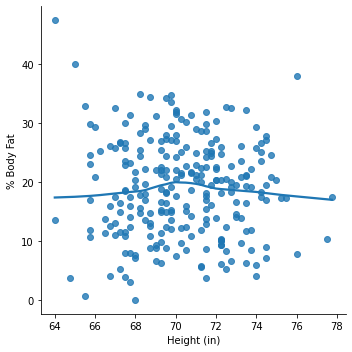

In [8]:
#Figure 9.2, page 295
sns.lmplot(data = fat, x = "Height", y = "Pct.BF", lowess = True, ci = None)
plt.xlabel("Height (in)")
plt.ylabel("% Body Fat")
plt.show()

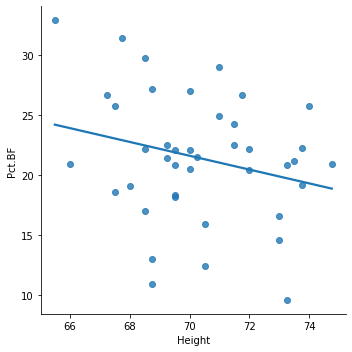

In [9]:
#Figure 9.3
#Filter data
data = fat[(fat["Waist"] >= 36) & (fat["Waist"] <= 38)]

sns.lmplot(data = data, x = "Height", y = "Pct.BF", ci = None)
plt.show()

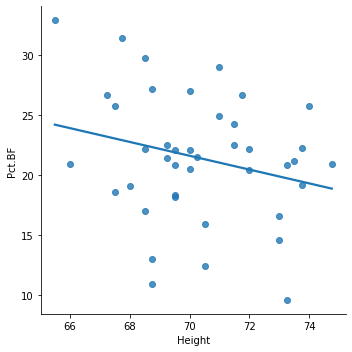

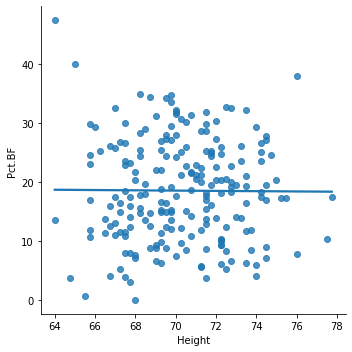

In [10]:
#Plotting all points
data = fat[(fat["Waist"] >= 36) & (fat["Waist"] <= 38)]
sns.lmplot(data = data, x = "Height", y = "Pct.BF", ci = None)

data = fat[(fat["Waist"] < 36) | (fat["Waist"] > 38)]
sns.lmplot(data = data, x = "Height", y = "Pct.BF", ci = None)
plt.show()

Question: How to make the plot in the book? In particular, how to add a new column, where the values are determined by whether the waist size is between 36 and 38 or not?

#### Section 9.3: The Multiple Regression Model - Assumptions and Conditions
#### Linearity Assumption
#### Equal Variance Assumption

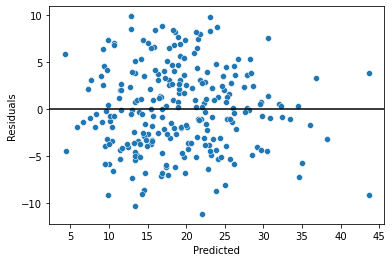

In [11]:
#Figure 9.4, page 298
x = sm.add_constant(fat[["Waist", "Height"]])
y = fat["Pct.BF"]
model = sm.OLS(y,x).fit()

sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.axhline(y = 0, color = "black", linestyle = "-")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### Check the residuals

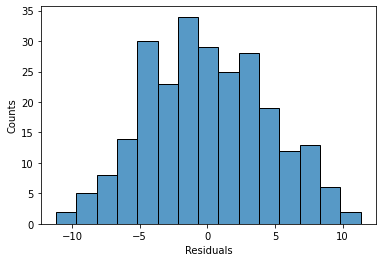

In [12]:
#Figure 9.5
sns.histplot(x = model.resid, binwidth = 1.5)
plt.xlabel("Residuals")
plt.ylabel("Counts")
plt.show()

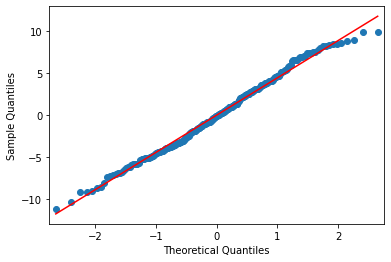

In [13]:
qqplot(data = model.resid, line = "s")
plt.show()

#### Step-By-Step Example: Multiple Regression

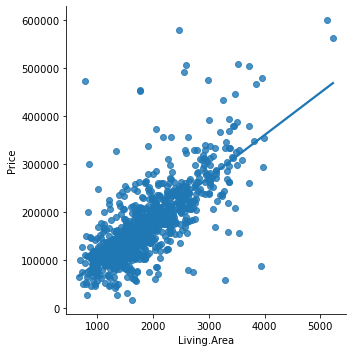

In [14]:
prices = pd.read_csv("datasets/housing-prices.txt", sep = "\t")
prices
sns.lmplot(data = prices, x = "Living.Area", y = "Price", ci = None)
plt.show()

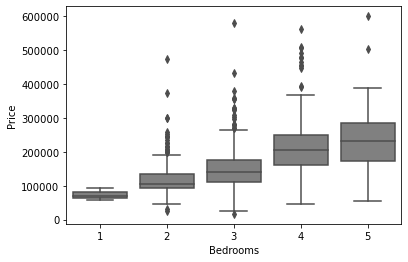

In [15]:
sns.boxplot(data = prices, x = "Bedrooms", y = "Price", color = "gray")
plt.show()

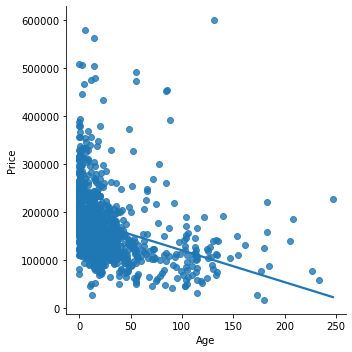

In [16]:
sns.lmplot(data = prices, x = "Age", y = "Price", ci = None)
plt.show()

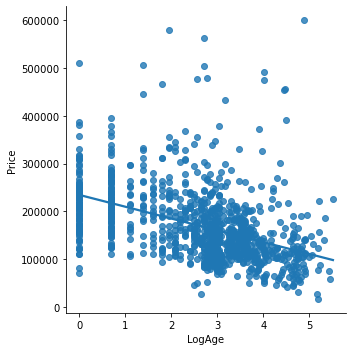

In [17]:
#Wrangle data
prices = prices.assign(log_age = np.log(prices["Age"] + 1))
sns.lmplot(data = prices, x = "log_age" , y = "Price", ci = None)
plt.xlabel("LogAge")
plt.show()

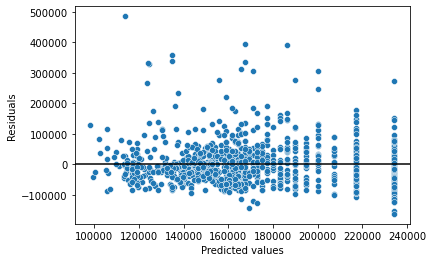

In [18]:
x = sm.add_constant(prices["log_age"])
y = prices["Price"]
model = sm.OLS(y,x).fit()

sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y = 0, color = "black", linestyle = "-")
plt.show()

In [19]:
x = sm.add_constant(prices[["log_age", "Living.Area", "Bedrooms"]])
y = prices["Price"]
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     500.1
Date:                Mon, 25 Jul 2022   Prob (F-statistic):          5.79e-202
Time:                        21:43:26   Log-Likelihood:                -12926.
No. Observations:                1057   AIC:                         2.586e+04
Df Residuals:                    1053   BIC:                         2.588e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         4.48e+04   8356.609      5.361      

#### Section 9.4: Partial Regression Plots

In [20]:
x = sm.add_constant(fat["Waist"])
y = fat["Pct.BF"]
otherthanheightlm = sm.OLS(y,x).fit()
residualsoflm = otherthanheightlm.resid

In [21]:
x = sm.add_constant(fat["Waist"])
y = fat["Height"]
yheightlm = sm.OLS(y,x).fit()
residualsoflm2 = yheightlm.resid

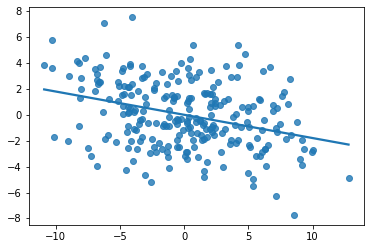

In [22]:
sns.regplot(x = residualsoflm, y = residualsoflm2, ci = None)
plt.show()

#### Just Checking

In [23]:
hurricanes = pd.read_csv("datasets/hurricanes_2018.txt", sep = "\t")
hurricanes = hurricanes[["Year","Central.Pressure(mb)","Max.Wind.Speed(kts)"]].dropna()

x = sm.add_constant(hurricanes[["Year", "Central.Pressure(mb)"]])
y = hurricanes["Max.Wind.Speed(kts)"]
model = sm.OLS(y,x).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Max.Wind.Speed(kts)   R-squared:                       0.810
Model:                             OLS   Adj. R-squared:                  0.809
Method:                  Least Squares   F-statistic:                     478.6
Date:                 Mon, 25 Jul 2022   Prob (F-statistic):           1.33e-81
Time:                         21:43:26   Log-Likelihood:                -799.13
No. Observations:                  227   AIC:                             1604.
Df Residuals:                      224   BIC:                             1615.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

#### Section 9.5: Indicator Variables

In [24]:
#Table 9.2, page 304
coaster = pd.read_csv("datasets/coasters-2015.txt", sep = "\t")
coaster.head()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
0,Top Thrill Dragster,Cedar Point,Steel,120.0,420.0,400.0,2800.0,NaN,0
1,Superman The Escap,Six Flags Magic Mountain,Steel,100.0,415.0,328.1,1235.0,NaN,0
2,Millennium Force,Cedar Point,Steel,93.0,310.0,300.0,6595.0,165.0,0
3,Goliath,Six Flags Magic Mountain,Steel,85.0,235.0,255.0,4500.0,180.0,0
4,Titan,Six Flags Over Texas,Steel,85.0,245.0,255.0,5312.0,210.0,0


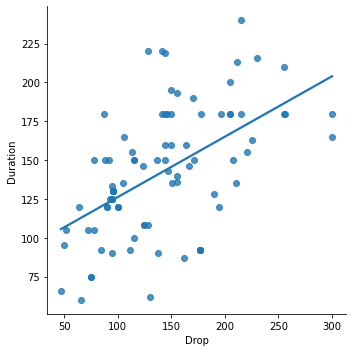

In [25]:
#Figure 9.7, page 305
sns.lmplot(data = coaster[coaster["Name"] != "Tower of Terror"], x = "Drop", y = "Duration", ci = None)
plt.show()

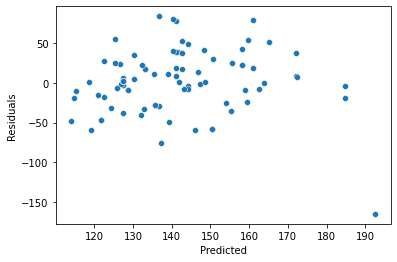

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     16.51
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000104
Time:                        21:43:27   Log-Likelihood:                -460.64
No. Observations:                  91   AIC:                             925.3
Df Residuals:                      89   BIC:                             930.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.8457     10.627      9.489      0.0

In [26]:
coaster = coaster[["Drop", "Duration"]].dropna()
x = sm.add_constant(coaster["Drop"])
y = coaster["Duration"]
model = sm.OLS(y,x).fit()

sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
print(model.summary())

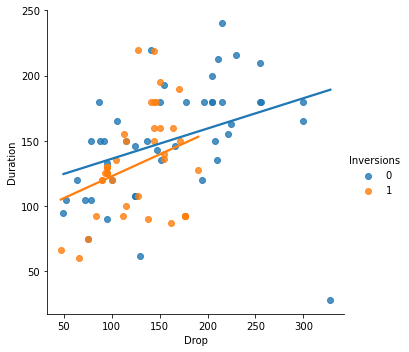

In [27]:
#Figure 9.8
coaster = pd.read_csv("datasets/coasters-2015.txt", sep = "\t")
sns.lmplot(data = coaster, x = "Drop", y = "Duration", hue = "Inversions", ci = None)
plt.show()

In [28]:
coaster = coaster.dropna()
x = sm.add_constant(coaster[["Drop", "Inversions"]])
y = coaster["Duration"]
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     9.012
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000275
Time:                        21:43:27   Log-Likelihood:                -459.91
No. Observations:                  91   AIC:                             925.8
Df Residuals:                      88   BIC:                             933.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.7550     12.953      8.473      0.0

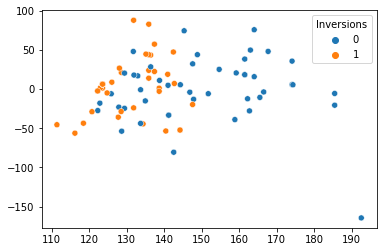

In [29]:
sns.scatterplot(data = coaster, x = model.fittedvalues, y = model.resid, hue = "Inversions")
plt.show()

#### Example 9.3: Using Indicator Variables

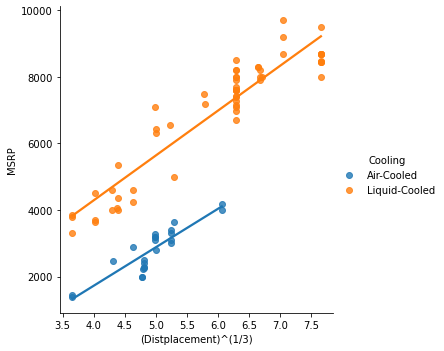

In [30]:
bikes = pd.read_csv("datasets/dirt-bikes-2014.txt", sep = "\t")
bikes = bikes[bikes["Cooling"] != "NA"]
bikes = bikes.assign(new_dist = bikes["Displacement"] ** (1/3))

sns.lmplot(data = bikes, x = "new_dist", y = "MSRP", hue = "Cooling", hue_order = ["Air-Cooled", "Liquid-Cooled"], ci = None)
plt.xlabel("(Distplacement)^(1/3)")
plt.show()

In [31]:
#Wrangle data, make dummy variables
data = bikes
cooling = pd.get_dummies(data["Cooling"], prefix = "N", drop_first = False)
cooling = cooling[["N_Air-Cooled", "N_Liquid-Cooled"]]
data = pd.concat([data, cooling], axis = 1)

In [32]:
x = sm.add_constant(data[["N_Air-Cooled", "N_Liquid-Cooled", "new_dist"]])
y = data["MSRP"]
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     621.1
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           9.00e-69
Time:                        21:43:28   Log-Likelihood:                -885.99
No. Observations:                 114   AIC:                             1780.
Df Residuals:                     110   BIC:                             1791.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -430.7601    329.054     

Question: This is surprisingly hard. Statsmodels doesn't seem to handle categorical variables well. Can you help me find a neater code? --> Will need revision here!

#### Adjusting for Different Slopes

In [34]:
king = pd.read_csv("datasets/burger-king-items.txt", sep = "\t")
king.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


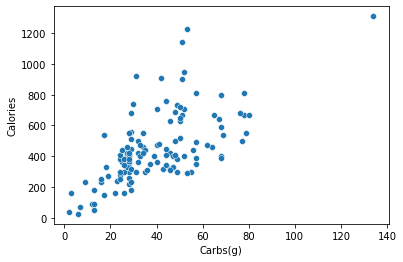

In [36]:
#Figure 9.9, page 308
sns.scatterplot(data = king, x = "Carbs(g)", y = "Calories")
plt.show()

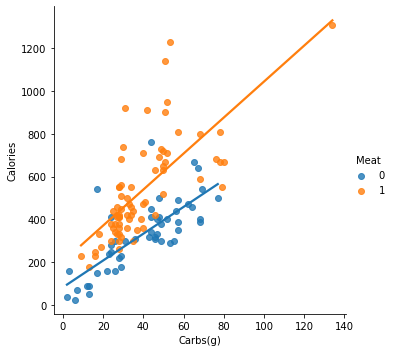

In [40]:
#Figure 9.10
sns.lmplot(data = king, x = "Carbs(g)", y = "Calories", hue = "Meat", ci = None)
plt.show()

In [52]:
#Clean up variable names
king = pd.read_csv("datasets/burger-king-items.txt", sep = "\t")
king = king.rename(columns = {"Carbs(g)" : "Carbs_g"})


mod = smf.ols(formula = "Calories ~ Carbs_g * Meat", data = king)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     60.80
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           7.80e-24
Time:                        22:44:49   Log-Likelihood:                -779.46
No. Observations:                 122   AIC:                             1567.
Df Residuals:                     118   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       83.5330     46.955      1.779   

Question: How to account for the interaction between two variables using statsmodels.api and not statsmodels.formula.api?

#### Note: statsmodels.api vs statsmodels.formula.api
Use statsmodels.api when:
- The variable names contain special characters (whitespaces, spaces, parentheses, quotation marks, etc.). You will have to clean up variable names if you want to use statsmodels.formula.api!

Use statsmodels.formula.api when:
- The variable names are CamelCase or snake_case (one uninterrupted long word)
- Your model has an interaction among two or more variables. As far as I know, statsmodels.api can not work with interactions, so the only way is to use this library. This is also an exception to the rule above (you will have to clean up variable names)
- At least one of your explanatory variables is categorical. As far as I know, even after converting a variable to categorical, statsmodels.api can still not work with it

#### One, Two, Many

In [64]:
cereals = pd.read_csv("datasets/cereals.txt", sep = "\t")
#Convert shelf to categorical variable
cereals["shelf"] = cereals["shelf"].astype("category")
cereals.head()

,name,mfr,calories,sugars,carbo,protein,fat,sodium,fiber,potass,shelf,Middle,shelf_1,shelf_2,shelf_3
0,100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,No,0,0,1
1,100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,No,0,0,1
2,All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,No,0,0,1
3,All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,No,0,0,1
4,Almond_Delight,R,110,8,14.0,2,2,200,1.0,-1,3,No,0,0,1


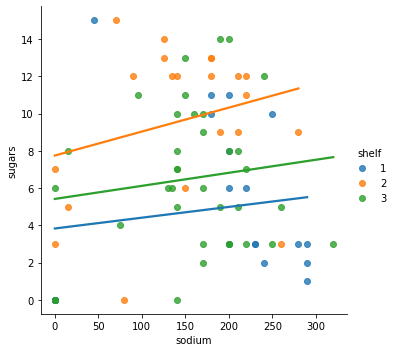

In [65]:
mod = smf.ols(formula = "sugars ~ sodium + shelf", data = cereals).fit()
sns.lmplot(data = cereals, x = "sodium", y = "sugars", hue = "shelf", ci = None)
plt.show()

In [66]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 sugars   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     5.583
Date:                Mon, 25 Jul 2022   Prob (F-statistic):            0.00167
Time:                        22:54:34   Log-Likelihood:                -215.28
No. Observations:                  77   AIC:                             438.6
Df Residuals:                      73   BIC:                             447.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4467      1.345      2.562      0.0

#### Example 9.4: Indicators for Variable with Several Levels

In [70]:
diamonds = pd.read_csv("datasets/diamonds.txt", sep = "\t")
diamonds = diamonds.rename(columns = {"Carat Size" : "carat_size"})
diamonds["Color"] = diamonds["Color"].astype("category")
diamonds = diamonds.assign(sqrt_price = np.sqrt(diamonds["Price"]))
diamonds.head()

,Price,carat_size,Color,Clarity,Cut,sqrt_price
0,1000,0.30,E,VVS1,Excellent,31.622777
1,1000,0.44,E,VS2,Excellent,31.622777
2,1000,0.31,E,VVS1,Excellent,31.622777
3,1000,0.66,K,SI1,Excellent,31.622777
4,1000,0.47,H,VS2,Very Good,31.622777


In [71]:
mod = smf.ols(data = diamonds, formula = "sqrt_price ~ carat_size + Color").fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             sqrt_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2030.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:05:19   Log-Likelihood:                -9129.5
No. Observations:                2690   AIC:                         1.828e+04
Df Residuals:                    2681   BIC:                         1.833e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1946      0.549     24.043      0.0

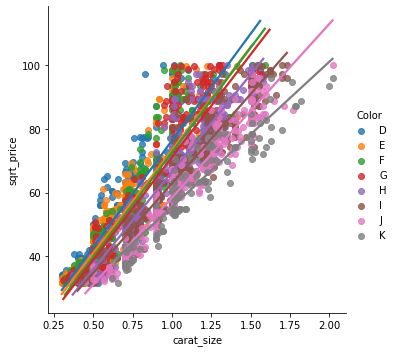

In [79]:
sns.lmplot(data = diamonds, x = "carat_size", y = "sqrt_price", hue = "Color", ci = None)
plt.show()

Question: How to plot a linear model plot without interaction (this is set by default) --> Currently this is not the correct plot for the linear model without interaction above!

In [73]:
#With interaction
mod2 = smf.ols(data = diamonds, formula = "sqrt_price ~ carat_size * Color").fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:             sqrt_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1141.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:09:14   Log-Likelihood:                -9065.4
No. Observations:                2690   AIC:                         1.816e+04
Df Residuals:                    2674   BIC:                         1.826e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.32

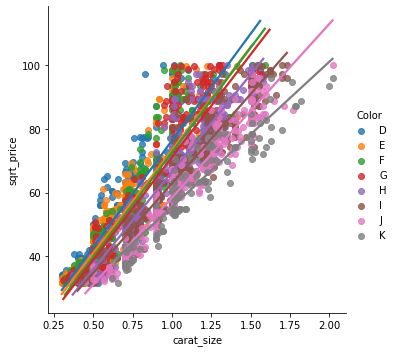

In [80]:
sns.lmplot(data = diamonds, x = "carat_size", y = "sqrt_price", hue = "Color", ci = None)
plt.show()